In [14]:
import librosa
import os
import soundfile as sf

In [15]:
voice_folder = '46_speaker_original\Test\Speaker46'
noise_folder = 'Noise'
output_folder = 'Voice_in_noise'
for voice in os.listdir(voice_folder):
    y_voice, sr = librosa.load(os.path.join(voice_folder, voice))

    for noise in os.listdir(noise_folder):
        y_noise, sr = librosa.load(os.path.join(noise_folder, noise))
        if(len(y_voice) > len(y_noise)):
            y_voice_and_noise = y_noise + y_voice[0:len(y_noise)]
        else:
            y_voice_and_noise = y_noise[0:len(y_voice)] + y_voice

        sf.write(f'{voice}_{noise}.wav', y_voice_and_noise, sr)


In [23]:
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
y_voice, sr = librosa.load("46_speaker_original\Test\Speaker46\Speaker46_part5.wav")
y_noise, sr = librosa.load('Noise\leaves.wav')
y_res, sr = librosa.load('Voice_in_noise\Part5\Speaker46_part5.wav_leaves.wav.wav')
print(len(y_noise))
# if(len(y_voice) > len(y_noise)):
#     y_voice_and_noise = y_noise + y_voice[0:len(y_noise)]
# else:
#     y_voice_and_noise = y_noise[len(y_voice)] + y_voice

# sf.write('lmao.wav', y_voice_and_noise, sr)

548252


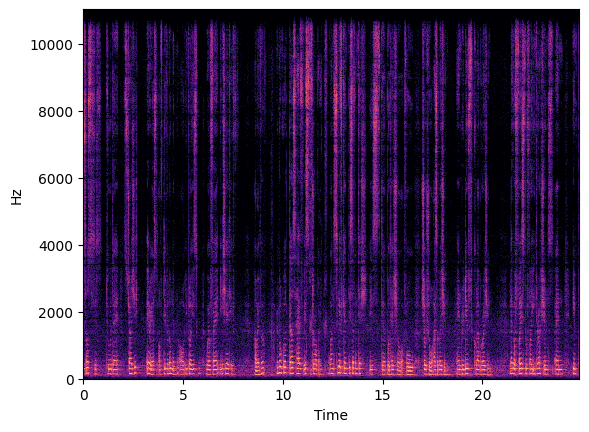

In [12]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y_voice[0:len(y_noise)])), ref=np.max)
librosa.display.specshow(D, y_axis='linear', x_axis='time')

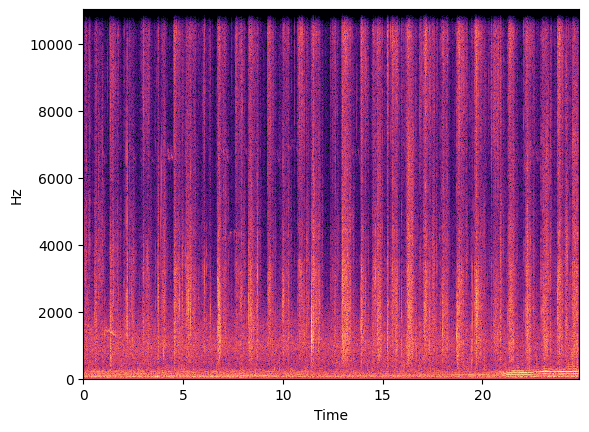

In [5]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y_noise)), ref=np.max)
librosa.display.specshow(D, y_axis='linear', x_axis='time')
# librosa.display.waveshow(y_noise)

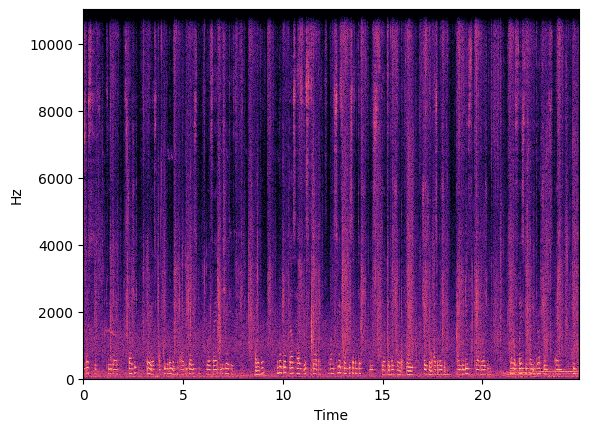

In [6]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y_voice_and_noise)), ref=np.max)
librosa.display.specshow(D, y_axis='linear', x_axis='time')
# librosa.display.waveshow(y_voice_and_noise)

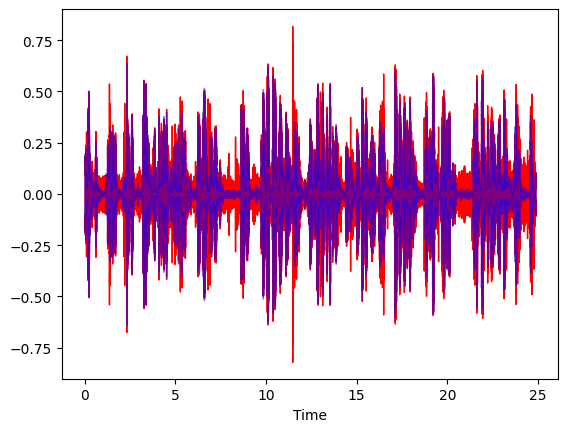

In [24]:
fig, ax = plt.subplots()
librosa.display.waveshow(y_voice_and_noise, sr=sr,color = 'r', ax=ax, alpha = 1)
librosa.display.waveshow(y_voice[0:len(y_noise)], sr=sr, color='b', ax=ax, alpha = 0.5)